# Test 4 SOM on Kepler and TESS Data

The fourth test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out sub-sampling to balance the dataset, eliminating some anomalous features and initializing the weights of the SOM with 50% composites from values ​​of Planets taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [3]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [4]:
X_train = X_train.drop(columns=['Unnamed: 0','Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
                                'Stellar log(g) (cm/s^2)', 'TESS Mag'])
y_train = y_train.drop(columns='Unnamed: 0')

In [5]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [6]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err']

In [7]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 13)
Shape of y_train: (10804, 1)


In [8]:
X_train = X_train.values
y_train = y_train.values

In [9]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  13


# Grid Search

In [43]:
param_grid = {
    'W': [None],
    'max_iter': [14000],
    'num_rows': [20],
    'num_cols': [20],
    'max_learning_rate': [0.8],
    'max_distance': [6, 10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [0.9, 1],
    'W_FALSE_PLANET': [1, 1.1],
    'K': [3, 5, 7, 11]
}

In [44]:
# grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=-1)
# best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

# print("Best param:", best_param)
# print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 6,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x2b73046478b0>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b7304647940>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7662817551963048

In [12]:
best_param = {}
best_param['W'] = None
best_param['max_iter'] = 14000
best_param['num_rows'] = 20
best_param['num_cols'] = 20
best_param['max_learning_rate'] = 0.8
best_param['max_distance'] = 10
best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
best_param['distance_nr'] = DistanceMetrics.manhattan_distance
best_param['W_PLANET'] = 0.9
best_param['W_FALSE_PLANET'] = 1
best_param['K'] = 11

In [13]:
W = best_param['W']
max_iter = best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [15]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=-1)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000001  | LR:    0.800000  | NR:   10.000000  | Time:    0.010860
Iteration:  01000  | QE:    0.000007  | LR:    0.742914  | NR:   10.000000  | Time:    4.547119
Iteration:  02000  | QE:    0.000013  | LR:    0.685771  | NR:    9.000000  | Time:    3.652811
Iteration:  03000  | QE:    0.000003  | LR:    0.628629  | NR:    8.000000  | Time:    3.482580
Iteration:  04000  | QE:    0.000002  | LR:    0.571486  | NR:    8.000000  | Time:    3.528357
Iteration:  05000  | QE:    0.000003  | LR:    0.514343  | NR:    7.000000  | Time:    3.986597
Iteration:  06000  | QE:    0.000002  | LR:    0.457200  | NR:    6.000000  | Time:    3.995895
Iteration:  07000  | QE:    0.000002  | LR:    0.400057  | NR:    6.000000  | Time:    3.983259
Iteration:  08000  | QE:    0.000001  | LR:    0.342914  | NR:    5.000000  | Time:    4.226208
Iteration:  09000  | QE:    0.000001  | LR:    0.285771  | NR:    4.000000  | Time:    3.950119
Iteration:  10000  | QE:    0.000009  | 

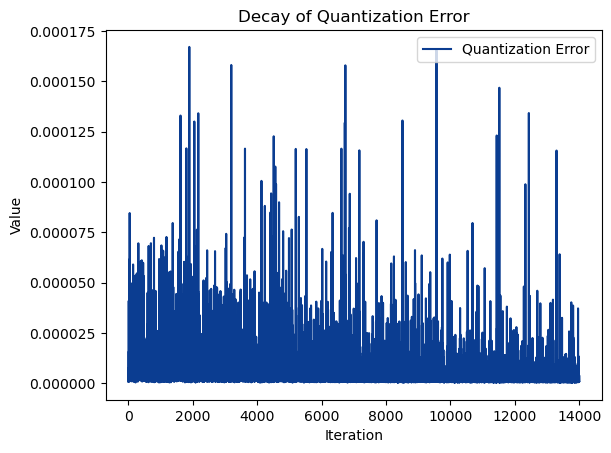

In [16]:
REDUCE = 1
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

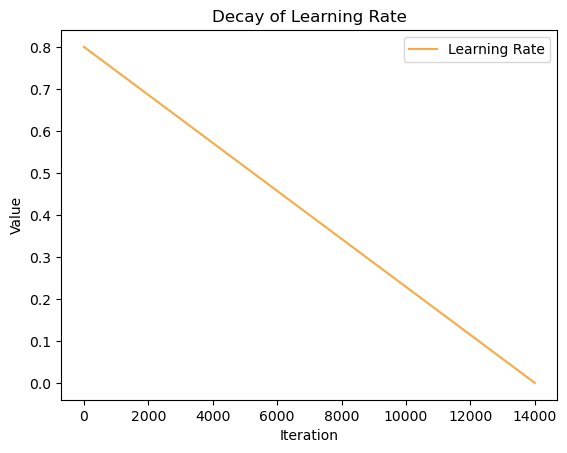

In [17]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

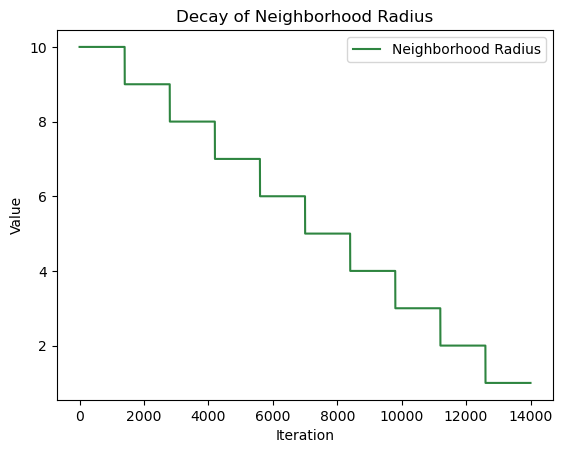

In [18]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

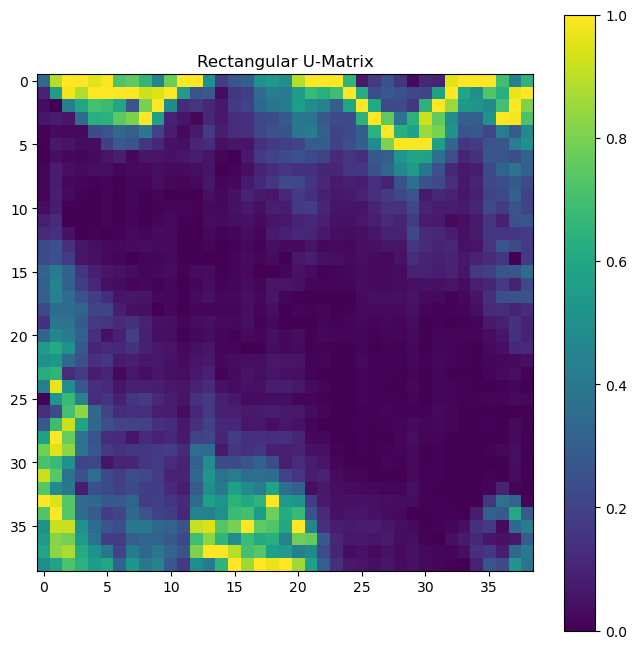

In [19]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

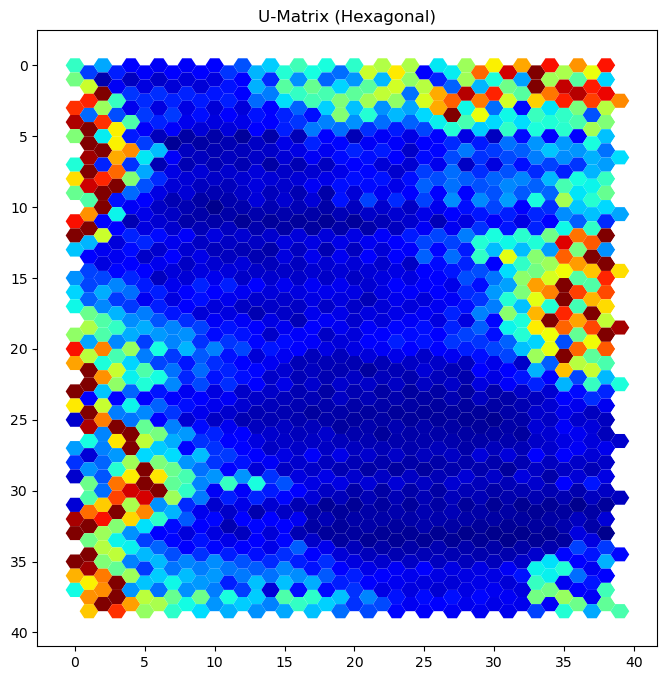

In [20]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

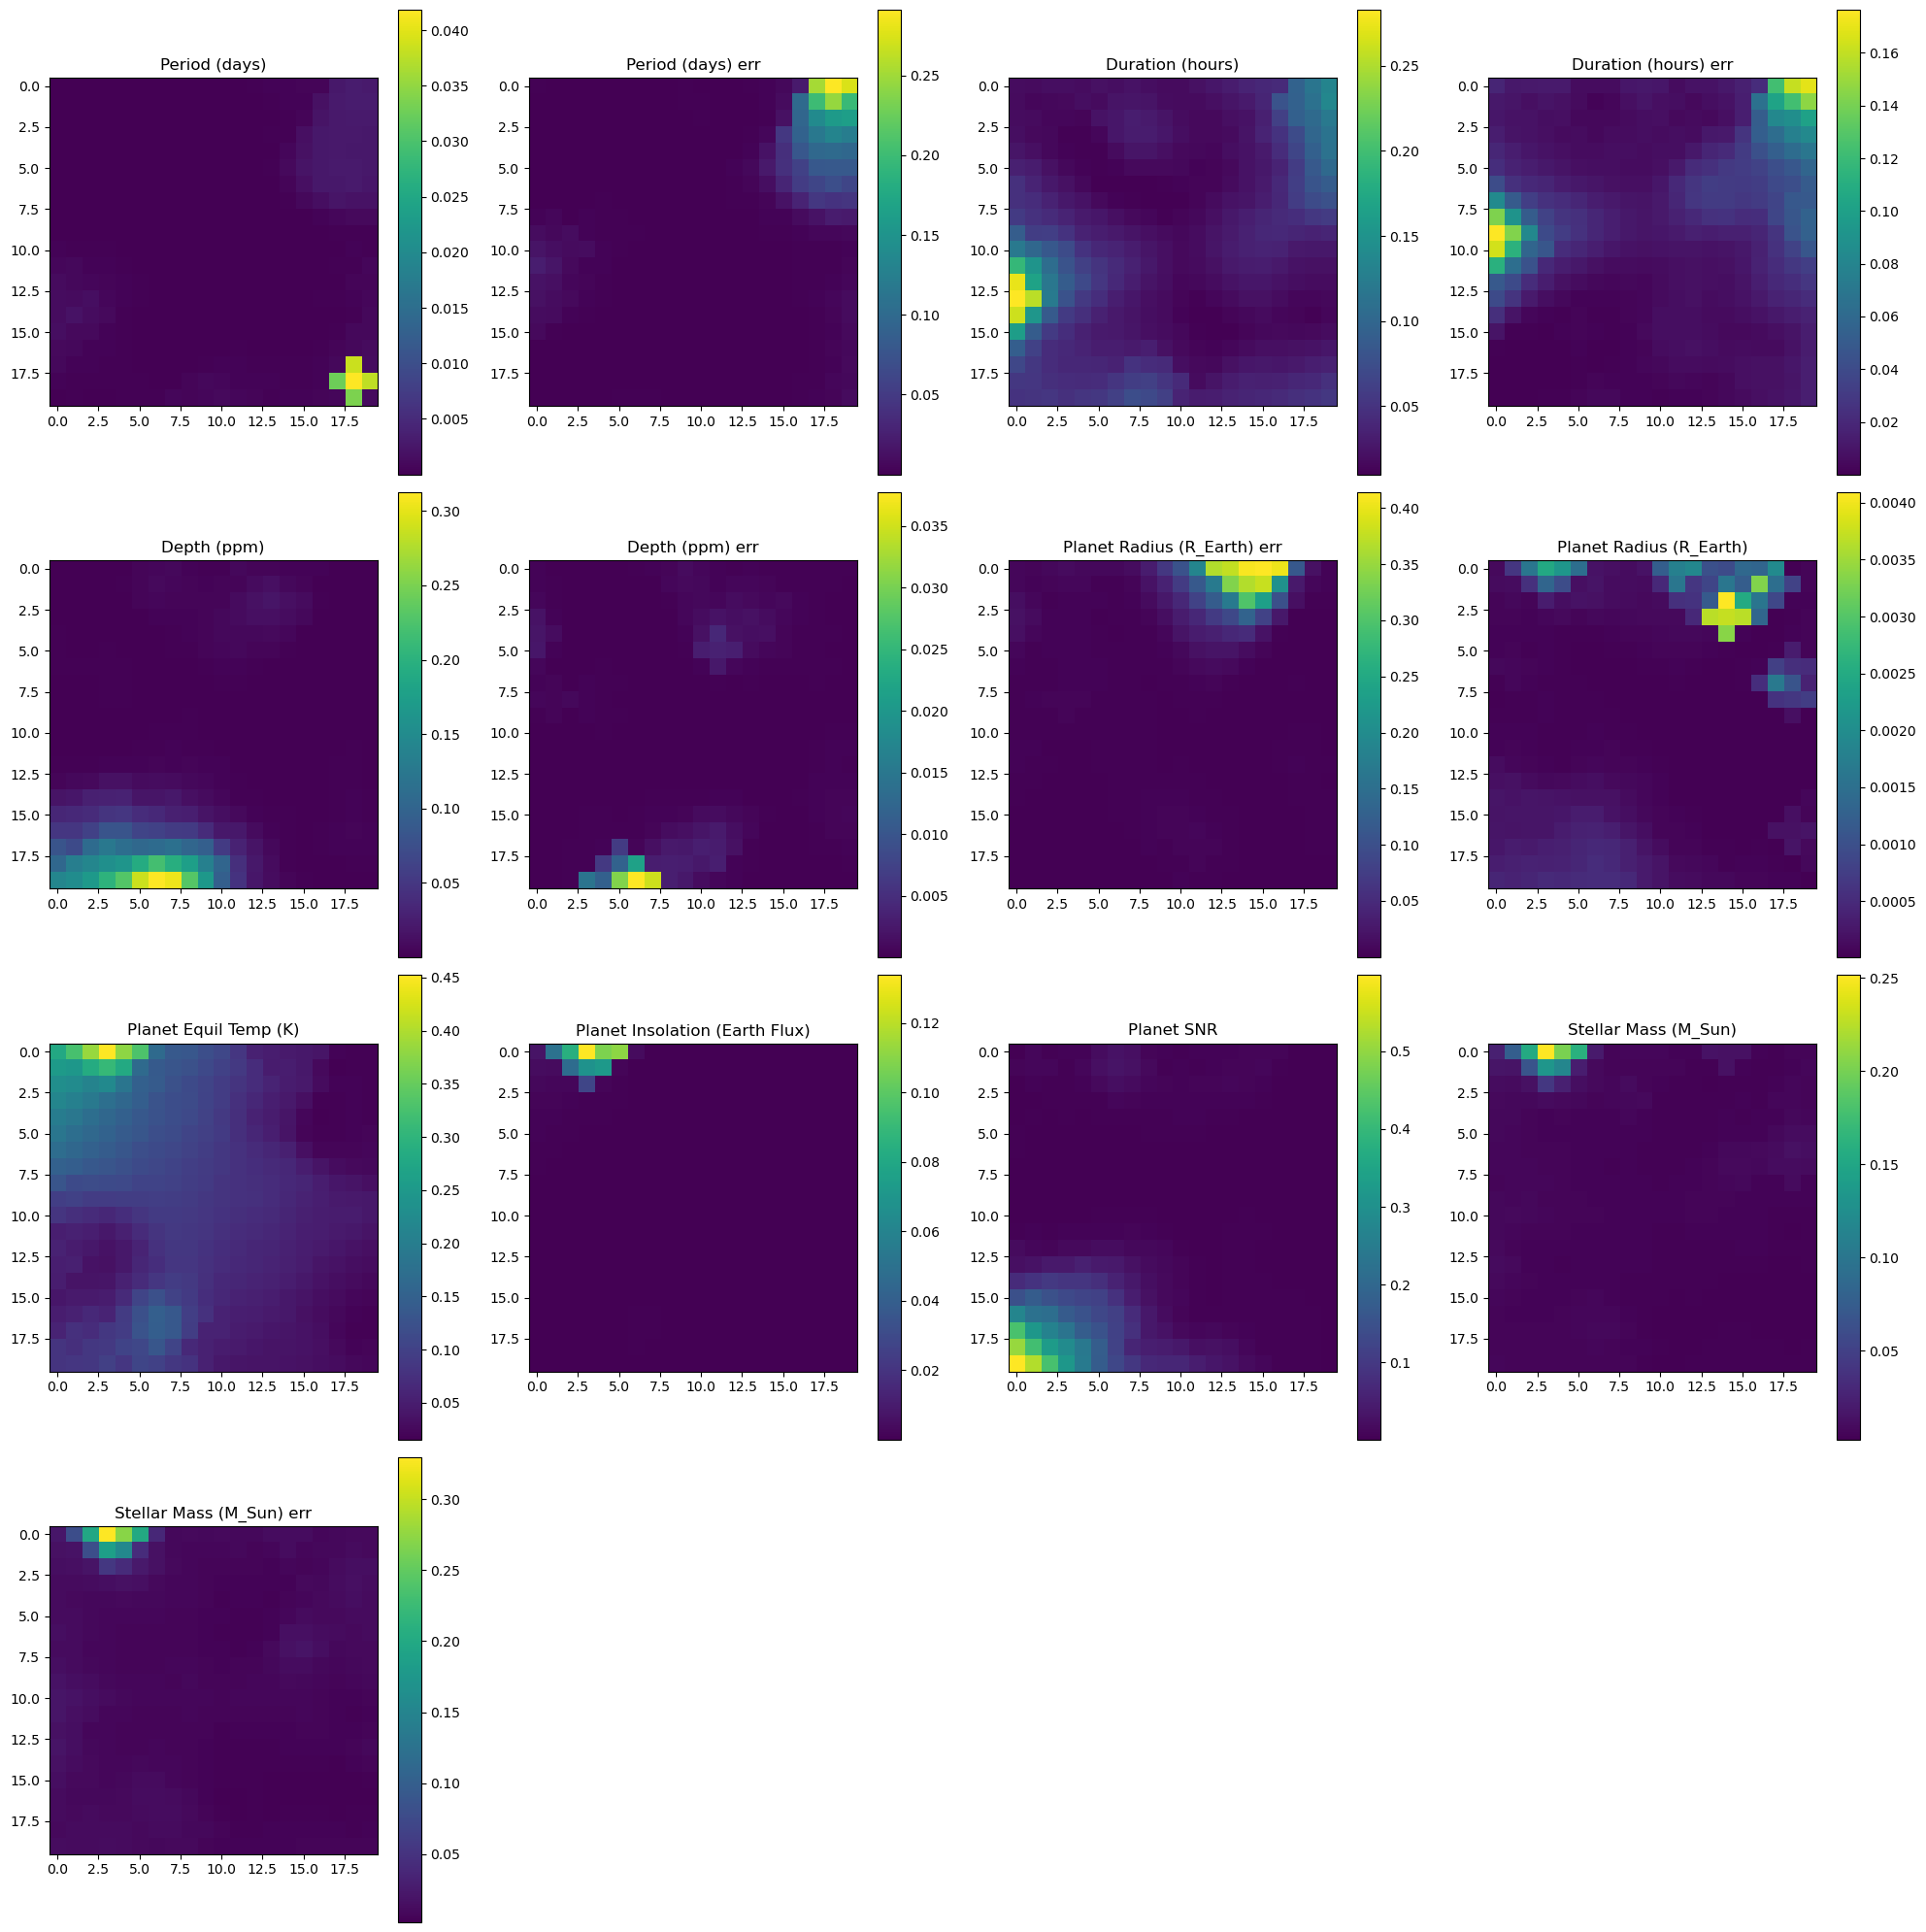

In [21]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [23]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(19, 2) -> Planet:   0, False Planet:  18
(4, 4)  -> Planet:   0, False Planet:  39
(13, 16)-> Planet:  27, False Planet:   0
(12, 9) -> Planet:  14, False Planet:   0
(11, 6) -> Planet:  35, False Planet:   0
(16, 1) -> Planet:   0, False Planet:  13
(16, 3) -> Planet:   0, False Planet:  18
(13, 14)-> Planet:  40, False Planet:   0
(6, 6)  -> Planet:   0, False Planet:  41
(1, 6)  -> Planet:   0, False Planet:  26
(13, 0) -> Planet:   0, False Planet:  24
(19, 16)-> Planet:  41, False Planet:   0
(10, 16)-> Planet:  21, False Planet:   0
(15, 3) -> Planet:   0, False Planet:  23
(3, 7)  -> Planet:  28, False Planet:   0
(4, 18) -> Planet:   0, False Planet:  15
(9, 19) -> Planet:  26, False Planet:   0
(0, 8)  -> Planet:  34, False Planet:   0
(8, 1)  -> Planet:   0, False Planet:  10
(14, 15)-> Planet:   0, False Planet:  30
(11, 12)-> Planet:  32, False Planet:   0
(2, 15) -> Planet:   0, False Planet:  19
(7, 9)  -> Planet:  36, False Planet:   0
(13, 11)-> Planet:  58, False Plan

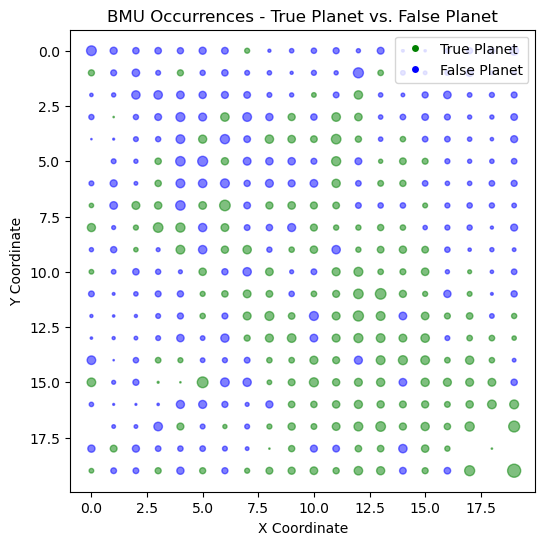

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [27]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

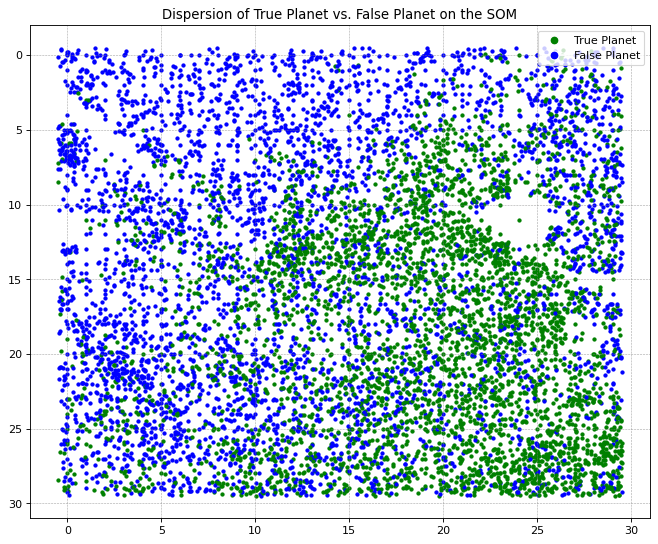

In [58]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

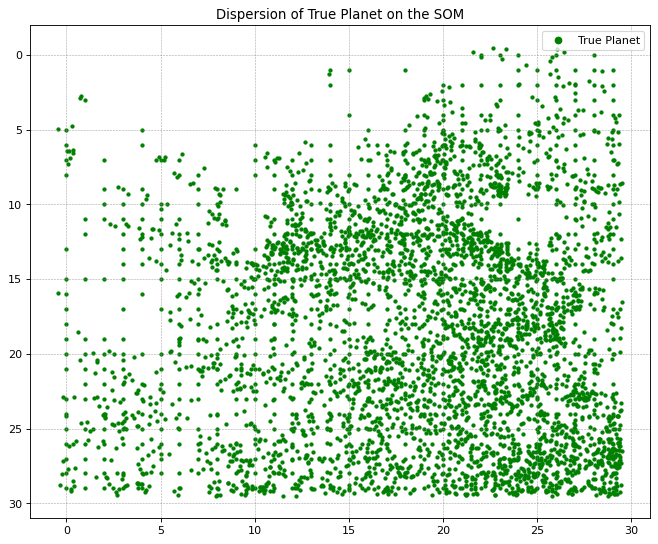

In [59]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

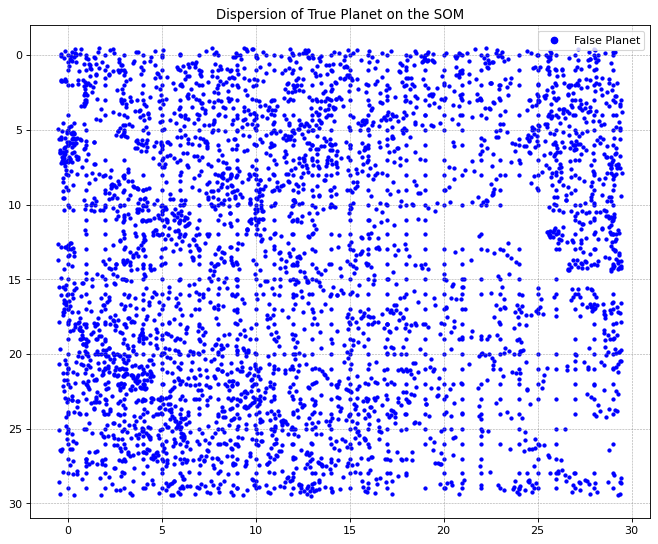

In [60]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

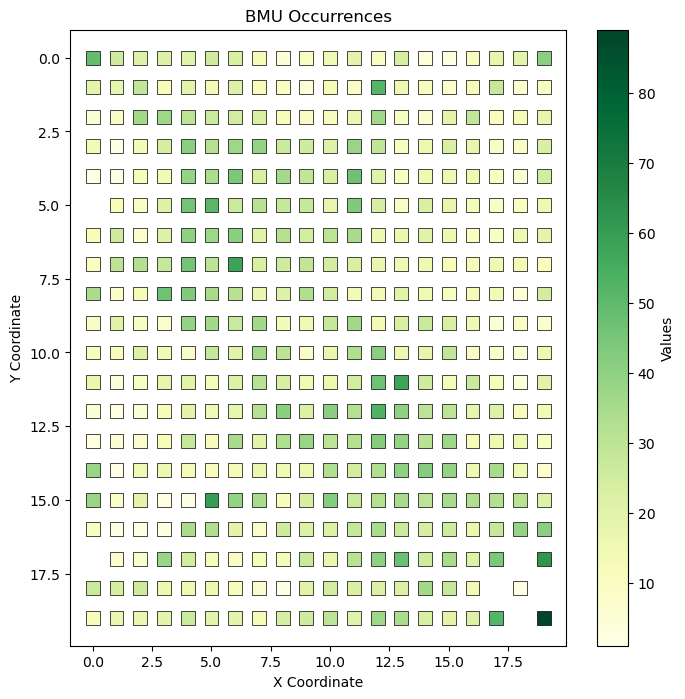

In [25]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

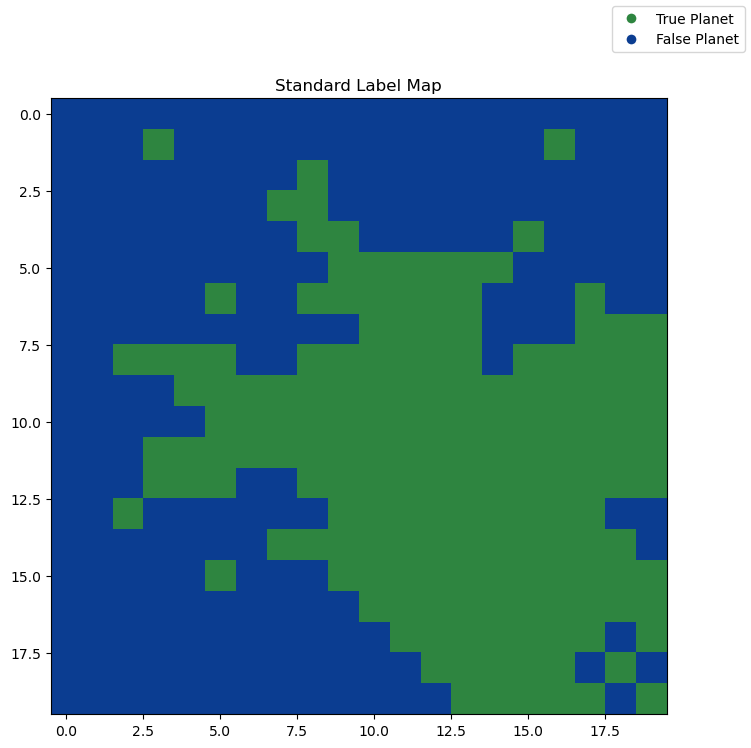

In [28]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

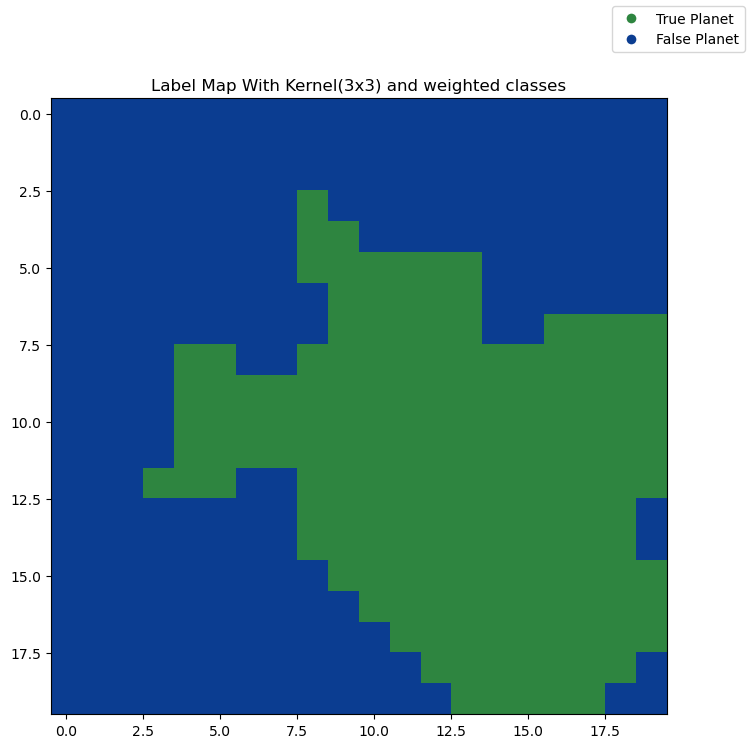

In [29]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

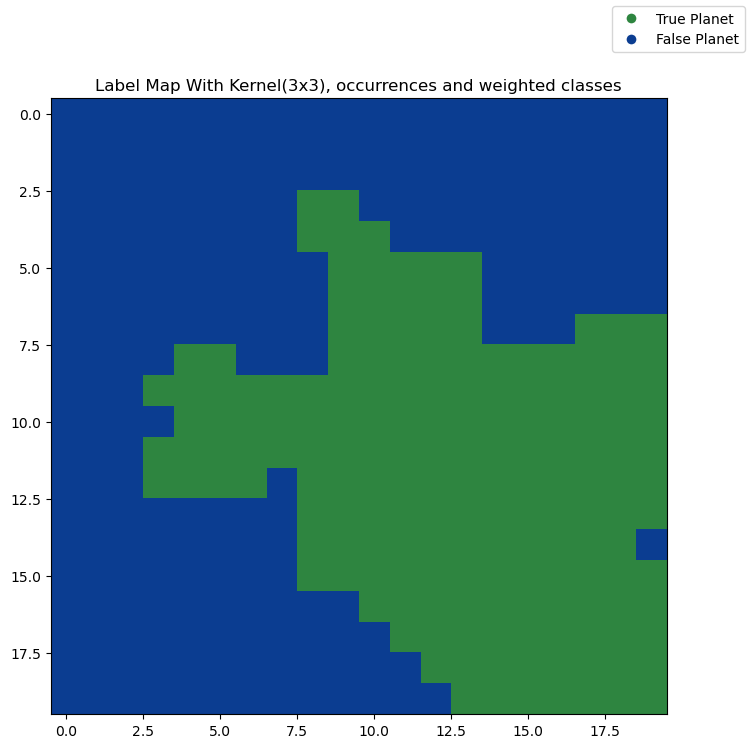

In [30]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7491901897269783
F1-score: 0.7547511312217193
Precision: 0.7271142109851787
Recall: 0.7845719661335842
cm:  [[785 313]
 [229 834]]


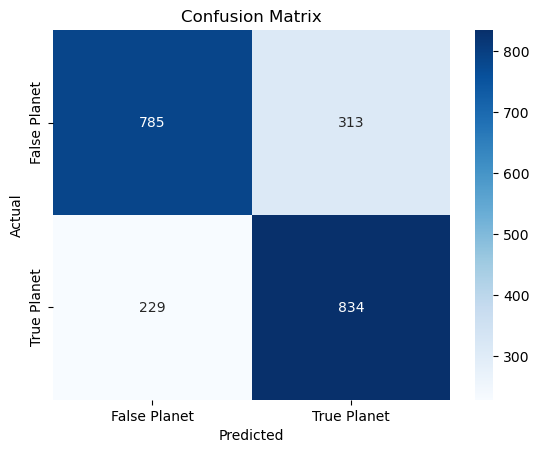

In [31]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7487274409995373
F1-score: 0.7517146776406036
Precision: 0.7313167259786477
Recall: 0.7732831608654751
cm:  [[796 302]
 [241 822]]


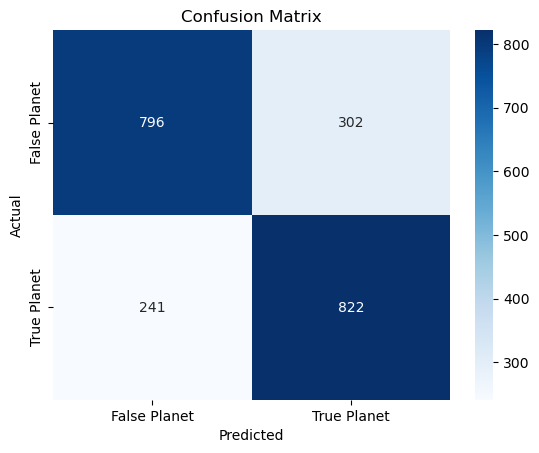

In [32]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7454881999074503
F1-score: 0.7493163172288059
Precision: 0.726790450928382
Recall: 0.7732831608654751
cm:  [[789 309]
 [241 822]]


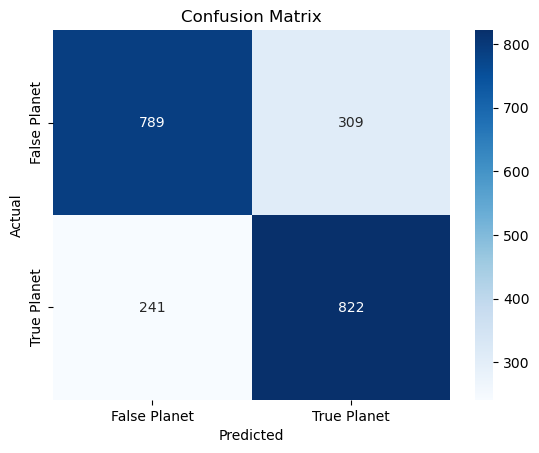

In [33]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7417862100879222
F1-score: 0.7456700091157703
Precision: 0.7232537577365163
Recall: 0.7695202257761053
cm:  [[785 313]
 [245 818]]


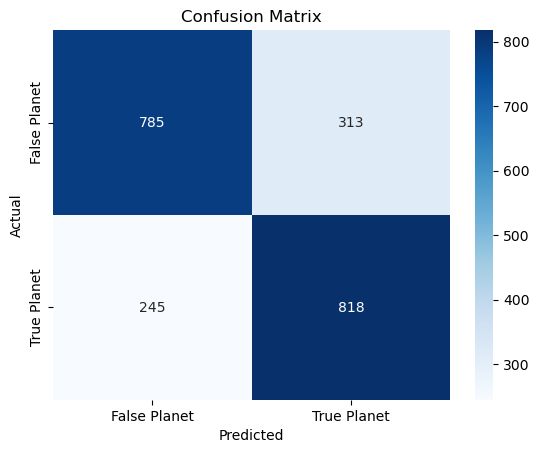

In [34]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)